# Python BANA Project
## By: Mohammad Zain Khaishagi (M13457536)

# About the Project

I have a client who has a company that makes industry reports and he wanted to know if it is possible to create a solution that can help their customers find relevant reports when they are searching for one.

I took the idea and created a POC in this project, attempting to solve the problem in a different context. Hoping that if my client asks me to build a solution for his use case, I'll already have a starting point and would have already worked out the major aspects of building such a solution.

What I have here is a program that reads various essays by Paul Graham of YCombinator, and comes up with word embeddings using a neural network. 
Users have an interface via a chat bot where they enter a word and get back a bunch of words which are used in the same context by Paul Graham.

## Setup

Built in docker using following docker image command:

docker run --rm -d -e GRANT_SUDO=yes -u root --name jupyterDS -p 8888:8888 -v ~/Docker:/home/jovyan jupyter/datascience-notebook start.sh jupyter lab

### Telegram API runs on python 3.7

In [ ]:
# # Run in terminal

# !sudo apt-get update
# !sudo apt-get install build-essential libpq-dev libssl-dev openssl libffi-dev zlib1g-dev
# !sudo apt-get install python3-pip python3.7-dev
# !sudo apt-get install python3.7

In [ ]:
# # Run in terminal

# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 2
# !sudo update-alternatives --config python3

In [1]:
!python3 -V

Python 3.7.3


### Install dependencies

In [2]:
!pip install nltk

     |████████████████████████████████| 1.4MB 663kB/s eta 0:00:01
     |████████████████████████████████| 686kB 8.1MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434675 sha256=5e37a3d4269ddc75054b1e959e86095657b2bac929c4d7b6a01f16daf5046ae6
  Stored in directory: /home/jovyan/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


In [3]:
!conda install -c conda-forge spacy -y
!python3 -m spacy download en

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    catalogue-1.0.0            |             py_0          10 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         151 KB  conda-forge
    cymem-2.0.3                |   py37h3340039_1          41 KB  conda-forge
    cython-blis-0.4.1          |   py37h8f50634_1         4.3 MB  conda-forge
    murmurhash-1.0.0           |   py37h3340039_0          16 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    plac-0.9.6    

In [4]:
!pip install -U aiogram

  Using cached https://files.pythonhosted.org/packages/ae/20/2fb5e5bccf77bd5883b310f6ba431550d8462eec7bfada556866c65ba06c/aiogram-2.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/15/a1/522dccd23e5d2e47aed4b6a16795b8213e3272c7506e625f2425ad025a19/Babel-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e3/71/6000eacb8923d9fd07aa8784a8fab4f022ae697f3c2456d7dca75c743dd6/aiohttp-3.6.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/54/7cb8eabe7dea1b441a7487ae3a1adb319f2d2e44a062a669f730a24dc474/yarl-1.4.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e1/1e/5a4441be21b0726c4464f3f23c8b19628372f606755a9d2e46c187e65ec4/async_timeout-3.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/98/3f/e53dea9face4115abfb796f398bf74747a0d294537b12935d1bbf697c11a/multidict-4.7.5-cp37-cp37m-manylinux1_x86_64.whl


In [5]:
!pip install tornado==4.5.3

# Restart kernel after running this cell

Processing /home/jovyan/.cache/pip/wheels/72/bf/f4/b68fa69596986881b397b18ff2b9af5f8181233aadcc9f76fd/tornado-4.5.3-cp37-cp37m-linux_x86_64.whl
ERROR: notebook 6.0.0 has requirement tornado>=5.0, but you'll have tornado 4.5.3 which is incompatible.
ERROR: jupyterhub 1.0.0 has requirement tornado>=5.0, but you'll have tornado 4.5.3 which is incompatible.
ERROR: distributed 2.5.2 has requirement dask>=2.3, but you'll have dask 2.2.0 which is incompatible.
ERROR: distributed 2.5.2 has requirement tornado>=5, but you'll have tornado 4.5.3 which is incompatible.
  Found existing installation: tornado 6.0.3
    Uninstalling tornado-6.0.3:
      Successfully uninstalled tornado-6.0.3


In [ ]:
# Auto restart kernel

import os
os._exit(00)

# Or below
# from IPython.core.display import HTML
# HTML("<script>Jupyter.notebook.kernel.restart()</script>")



### Get the right tensorflow version

In [1]:
# # Run on Colab

# #%tensorflow_version 2.x
# %tensorflow_version 1.x 



UsageError: Line magic function `%tensorflow_version` not found.


In [29]:
# Run on Linux Jupyter

import sys 
!{sys.executable} -m pip install tensorflow==1.15.0

### Import libraries

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [31]:
# List of potential datasets to use:

# Childrens' Books https://github.com/HendrikStrobelt/LSTMVis
# Wikihow https://github.com/mahnazkoupaee/WikiHow-Dataset
# Wikipedia https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/
# Reddit https://github.com/GradySimon/tensorflow-glove/blob/6a05b0545283cb2e576f2286e5dca11a1e42bbb9/Getting%20Started.ipynb
# Paul Graham http://paulgraham.com/articles.html



## Building the neural network graph

### Package doesn't work out of the box due to deprecated tensorflow API functions

In [32]:
# import requests

# url = 'https://raw.githubusercontent.com/GradySimon/tensorflow-glove/6a05b0545283cb2e576f2286e5dca11a1e42bbb9/tf_glove.py'
# r = requests.get(url, allow_redirects=True)
# open('tf_glove.py', 'wb').write(r.content)

# import tf_glove

# model = tf_glove.GloVeModel(embedding_size=50, context_size=10, min_occurrences=25,
#                             learning_rate=0.05, batch_size=512)

### Made changes to source code of package to make it compatible

In [33]:
# Updated tf_glove to remove the following warnings

# WARNING:tensorflow:From /content/tf_glove.py:69: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

# WARNING:tensorflow:From /content/tf_glove.py:77: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

# WARNING:tensorflow:From /content/tf_glove.py:96: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
# Instructions for updating:
# Deprecated in favor of operator or tf.math.divide.
# WARNING:tensorflow:From /content/tf_glove.py:101: The name tf.log is deprecated. Please use tf.math.log instead.

# WARNING:tensorflow:From /content/tf_glove.py:101: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
# Instructions for updating:
# Use `tf.cast` instead.
# WARNING:tensorflow:From /content/tf_glove.py:111: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

# WARNING:tensorflow:From /content/tf_glove.py:112: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

# WARNING:tensorflow:From /tensorflow-1.15.2/python3.6/tensorflow_core/python/training/adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
# Instructions for updating:
# Call initializer instance with the dtype argument instead of passing it to the constructor
# WARNING:tensorflow:From /content/tf_glove.py:114: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



from __future__ import division
from collections import Counter, defaultdict
import os
from random import shuffle
import tensorflow as tf


class NotTrainedError(Exception):
    pass

class NotFitToCorpusError(Exception):
    pass

class GloVeModel():
    def __init__(self, embedding_size, context_size, max_vocab_size=100000, min_occurrences=1,
                 scaling_factor=3/4, cooccurrence_cap=100, batch_size=512, learning_rate=0.05):
        self.embedding_size = embedding_size
        if isinstance(context_size, tuple):
            self.left_context, self.right_context = context_size
        elif isinstance(context_size, int):
            self.left_context = self.right_context = context_size
        else:
            raise ValueError("`context_size` should be an int or a tuple of two ints")
        self.max_vocab_size = max_vocab_size
        self.min_occurrences = min_occurrences
        self.scaling_factor = scaling_factor
        self.cooccurrence_cap = cooccurrence_cap
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.__words = None
        self.__word_to_id = None
        self.__cooccurrence_matrix = None
        self.__embeddings = None

    def fit_to_corpus(self, corpus):
        self.__fit_to_corpus(corpus, self.max_vocab_size, self.min_occurrences,
                             self.left_context, self.right_context)
        self.__build_graph()

    def __fit_to_corpus(self, corpus, vocab_size, min_occurrences, left_size, right_size):
        word_counts = Counter()
        cooccurrence_counts = defaultdict(float)
        for region in corpus:
            word_counts.update(region)
            for l_context, word, r_context in _context_windows(region, left_size, right_size):
                for i, context_word in enumerate(l_context[::-1]):
                    # add (1 / distance from focal word) for this pair
                    cooccurrence_counts[(word, context_word)] += 1 / (i + 1)
                for i, context_word in enumerate(r_context):
                    cooccurrence_counts[(word, context_word)] += 1 / (i + 1)
        if len(cooccurrence_counts) == 0:
            raise ValueError("No coccurrences in corpus. Did you try to reuse a generator?")
        self.__words = [word for word, count in word_counts.most_common(vocab_size)
                        if count >= min_occurrences]
        self.__word_to_id = {word: i for i, word in enumerate(self.__words)}
        self.__cooccurrence_matrix = {
            (self.__word_to_id[words[0]], self.__word_to_id[words[1]]): count
            for words, count in cooccurrence_counts.items()
            if words[0] in self.__word_to_id and words[1] in self.__word_to_id}

    def __build_graph(self):
        self.__graph = tf.Graph()
        with self.__graph.as_default(), self.__graph.device(_device_for_node):
            count_max = tf.constant([self.cooccurrence_cap], dtype=tf.float32,
                                    name='max_cooccurrence_count')
            scaling_factor = tf.constant([self.scaling_factor], dtype=tf.float32,
                                         name="scaling_factor")

            self.__focal_input = tf.compat.v1.placeholder(tf.int32, shape=[self.batch_size],
                                                name="focal_words")
            self.__context_input = tf.compat.v1.placeholder(tf.int32, shape=[self.batch_size],
                                                  name="context_words")
            self.__cooccurrence_count = tf.compat.v1.placeholder(tf.float32, shape=[self.batch_size],
                                                       name="cooccurrence_count")

            focal_embeddings = tf.Variable(
                tf.random.uniform([self.vocab_size, self.embedding_size], 1.0, -1.0),
                name="focal_embeddings")
            context_embeddings = tf.Variable(
                tf.random.uniform([self.vocab_size, self.embedding_size], 1.0, -1.0),
                name="context_embeddings")

            focal_biases = tf.Variable(tf.random.uniform([self.vocab_size], 1.0, -1.0),
                                       name='focal_biases')
            context_biases = tf.Variable(tf.random.uniform([self.vocab_size], 1.0, -1.0),
                                         name="context_biases")

            focal_embedding = tf.nn.embedding_lookup([focal_embeddings], self.__focal_input)
            context_embedding = tf.nn.embedding_lookup([context_embeddings], self.__context_input)
            focal_bias = tf.nn.embedding_lookup([focal_biases], self.__focal_input)
            context_bias = tf.nn.embedding_lookup([context_biases], self.__context_input)

            weighting_factor = tf.minimum(
                1.0,
                tf.pow(
                    tf.math.divide(self.__cooccurrence_count, count_max),
                    scaling_factor))

            embedding_product = tf.reduce_sum(tf.multiply(focal_embedding, context_embedding), 1)

            log_cooccurrences = tf.math.log(tf.cast(self.__cooccurrence_count, dtype=tf.float32))

            distance_expr = tf.square(tf.add_n([
                embedding_product,
                focal_bias,
                context_bias,
                tf.negative(log_cooccurrences)]))

            single_losses = tf.multiply(weighting_factor, distance_expr)
            self.__total_loss = tf.reduce_sum(single_losses)
            tf.compat.v1.summary.scalar("GloVe_loss", self.__total_loss)
            self.__optimizer = tf.compat.v1.train.AdagradOptimizer(self.learning_rate).minimize(
                self.__total_loss)
            self.__summary = tf.compat.v1.summary.merge_all()

            self.__combined_embeddings = tf.add(focal_embeddings, context_embeddings,
                                                name="combined_embeddings")

    def train(self, num_epochs, log_dir=None, summary_batch_interval=1000,
              tsne_epoch_interval=None):
        should_write_summaries = log_dir is not None and summary_batch_interval
        should_generate_tsne = log_dir is not None and tsne_epoch_interval
        batches = self.__prepare_batches()
        total_steps = 0
        with tf.Session(graph=self.__graph) as session:
            if should_write_summaries:
                print("Writing TensorBoard summaries to {}".format(log_dir))
                summary_writer = tf.summary.FileWriter(log_dir, graph=session.graph)
            tf.global_variables_initializer().run()
            for epoch in range(num_epochs):
                shuffle(batches)
                for batch_index, batch in enumerate(batches):
                    i_s, j_s, counts = batch
                    if len(counts) != self.batch_size:
                        continue
                    feed_dict = {
                        self.__focal_input: i_s,
                        self.__context_input: j_s,
                        self.__cooccurrence_count: counts}
                    session.run([self.__optimizer], feed_dict=feed_dict)
                    if should_write_summaries and (total_steps + 1) % summary_batch_interval == 0:
                        summary_str = session.run(self.__summary, feed_dict=feed_dict)
                        summary_writer.add_summary(summary_str, total_steps)
                    total_steps += 1
                if should_generate_tsne and (epoch + 1) % tsne_epoch_interval == 0:
                    current_embeddings = self.__combined_embeddings.eval()
                    output_path = os.path.join(log_dir, "epoch{:03d}.png".format(epoch + 1))
                    self.generate_tsne(output_path, embeddings=current_embeddings)
            self.__embeddings = self.__combined_embeddings.eval()
            if should_write_summaries:
                summary_writer.close()

    def embedding_for(self, word_str_or_id):
        if isinstance(word_str_or_id, str):
            return self.embeddings[self.__word_to_id[word_str_or_id]]
        elif isinstance(word_str_or_id, int):
            return self.embeddings[word_str_or_id]

    def __prepare_batches(self):
        if self.__cooccurrence_matrix is None:
            raise NotFitToCorpusError(
                "Need to fit model to corpus before preparing training batches.")
        cooccurrences = [(word_ids[0], word_ids[1], count)
                         for word_ids, count in self.__cooccurrence_matrix.items()]
        i_indices, j_indices, counts = zip(*cooccurrences)
        return list(_batchify(self.batch_size, i_indices, j_indices, counts))

    @property
    def vocab_size(self):
        return len(self.__words)

    @property
    def words(self):
        if self.__words is None:
            raise NotFitToCorpusError("Need to fit model to corpus before accessing words.")
        return self.__words

    @property
    def embeddings(self):
        if self.__embeddings is None:
            raise NotTrainedError("Need to train model before accessing embeddings")
        return self.__embeddings

    def id_for_word(self, word):
        if self.__word_to_id is None:
            raise NotFitToCorpusError("Need to fit model to corpus before looking up word ids.")
        return self.__word_to_id[word]

    def generate_tsne(self, path=None, size=(100, 100), word_count=1000, embeddings=None):
        if embeddings is None:
            embeddings = self.embeddings
        from sklearn.manifold import TSNE
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
        low_dim_embs = tsne.fit_transform(embeddings[:word_count, :])
        labels = self.words[:word_count]
        return _plot_with_labels(low_dim_embs, labels, path, size)


def _context_windows(region, left_size, right_size):
    for i, word in enumerate(region):
        start_index = i - left_size
        end_index = i + right_size
        left_context = _window(region, start_index, i - 1)
        right_context = _window(region, i + 1, end_index)
        yield (left_context, word, right_context)


def _window(region, start_index, end_index):
    """
    Returns the list of words starting from `start_index`, going to `end_index`
    taken from region. If `start_index` is a negative number, or if `end_index`
    is greater than the index of the last word in region, this function will pad
    its return value with `NULL_WORD`.
    """
    last_index = len(region) + 1
    selected_tokens = region[max(start_index, 0):min(end_index, last_index) + 1]
    return selected_tokens


def _device_for_node(n):
    if n.type == "MatMul":
        return "/gpu:0"
    else:
        return "/cpu:0"


def _batchify(batch_size, *sequences):
    for i in range(0, len(sequences[0]), batch_size):
        yield tuple(sequence[i:i+batch_size] for sequence in sequences)


def _plot_with_labels(low_dim_embs, labels, path, size):
    import matplotlib.pyplot as plt
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    figure = plt.figure(figsize=size)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right',
                     va='bottom')
    if path is not None:
        figure.savefig(path)
        plt.close(figure)


## Data Scraping

In [34]:
from bs4 import BeautifulSoup
import requests
import nltk
import spacy
nlp = spacy.load('en')


#url =  'http://paulgraham.com/useful.html'

url = [
    'http://paulgraham.com/useful.html',
    'http://paulgraham.com/fh.html',
    'http://paulgraham.com/kids.html',
    'http://paulgraham.com/lesson.html',
    'http://paulgraham.com/genius.html',
    'http://paulgraham.com/pgh.html',
    'http://paulgraham.com/vb.html',
    'http://paulgraham.com/ineq.html',
    'http://paulgraham.com/re.html']


def get_corpus(url):
    # Get divs/tags with essay content

    page = requests.get(url)
    print(page)
    soup = BeautifulSoup(page.text, "html.parser")
    tags = soup.findAll("font")

    # Extraxt text of essay from the tags

    a=[]
    i=0
    for tag in tags:
      a.append(tag.get_text())
    text=a[0]

    # Convert essay to one list of all words/tokens in the essay

    corpus = nltk.regexp_tokenize(text.lower(), pattern='\w+|\$[\d\.]+|\S+')
    corpus

    # Filter unwanted words

    corpus = [x for x in corpus if len(x)>2 and not nlp.vocab[x].is_stop]
    
    return(corpus)

In [35]:


# Create a list of list of words
x = []

for u in url:
    x.append(get_corpus(u))

corpus = x

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [36]:
# Total words in corpus

tot_words = len([item for sublist in corpus for item in sublist])
tot_words

8415

### Statistics

In [37]:
from statistics import *

print(" 1. Average words per essay:")

print(tot_words/len(corpus))


print("\n 2. Median of words in essays:")

print(median([len(sublist) for sublist in corpus]))


print("\n 3. STDEV of words per essay:")

print(stdev([len(sublist) for sublist in corpus]))


print("\n 4. Variance of words in essays:")

print(variance([len(sublist) for sublist in corpus]))


print("\n 5. 20% quantile of words in essays:")

print(np.quantile([len(sublist) for sublist in corpus],.2))


print("\n 6. 80% quantile of words in essays:")

print(np.quantile([len(sublist) for sublist in corpus],.8))

 1. Average words per essay:
935.0

 2. Median of words in essays:
688

 3. STDEV of words per essay:
442.28525862841053

 4. Variance of words in essays:
195616.25

 5. 20% quantile of words in essays:
562.8

 6. 80% quantile of words in essays:
1307.2


## Training the model to get word embeddings

In [38]:
model = GloVeModel(embedding_size=50, context_size=100, min_occurrences=4, learning_rate=0.05, batch_size=512)
model.fit_to_corpus(corpus)

In [39]:
model.train(num_epochs=500, log_dir="log/example", summary_batch_interval=1000)

Writing TensorBoard summaries to log/example


In [40]:
model.vocab_size

535

In [41]:
model.embeddings

array([[ 0.00549723, -0.3419075 ,  0.5598053 , ...,  1.1371992 ,
         0.28760412,  0.40691328],
       [-0.5082743 , -0.22999993,  0.35022554, ...,  0.35021052,
        -0.7726177 ,  0.41257316],
       [-0.84160197, -0.24547724,  0.7701332 , ...,  0.76941216,
         0.14709502,  0.4768706 ],
       ...,
       [ 0.44843397,  1.5856696 ,  0.49167562, ..., -1.1554799 ,
         1.2781249 ,  0.5686885 ],
       [ 0.13085338,  1.5423346 , -0.08782068, ..., -1.2917604 ,
         0.21437836,  1.187403  ],
       [-0.16333723,  0.16527161, -0.505641  , ..., -0.9146146 ,
        -0.53743887,  1.3623589 ]], dtype=float32)

In [42]:
import pandas as pd
embeddings = pd.DataFrame(model.embeddings)

In [43]:
%%time
from scipy.spatial import distance_matrix
d_mat = pd.DataFrame(distance_matrix(embeddings.values, embeddings.values), index=embeddings.index, columns=embeddings.index)
d_mat

CPU times: user 267 ms, sys: 27.9 ms, total: 295 ms
Wall time: 314 ms


,0,1,2,3,4,5,6,7,8,9,...,525,526,527,528,529,530,531,532,533,534
0,0.000000,3.966884,4.032689,4.603360,4.566685,6.557012,5.350639,5.204542,4.650232,6.548624,...,6.582903,6.913231,6.137475,6.436873,6.026655,7.962196,6.236310,7.295793,7.338404,7.289738
1,3.966884,0.000000,4.081120,4.147762,3.781866,5.538096,4.987604,4.970423,4.257550,5.266198,...,7.112973,6.966654,5.509451,6.765790,5.672624,7.435905,6.033432,7.109074,6.595866,6.665857
2,4.032689,4.081120,0.000000,4.035407,4.138785,6.092539,5.470031,5.404204,4.418484,6.307175,...,7.248228,6.827211,6.379741,7.106112,5.778581,8.236152,5.346177,7.343586,7.465026,7.287845
3,4.603360,4.147762,4.035407,0.000000,4.626892,6.066364,5.079388,5.689336,4.977274,6.205324,...,6.722313,6.890068,6.272744,7.043009,5.969399,7.989766,6.132447,6.899376,7.233609,7.391521
4,4.566685,3.781866,4.138785,4.626892,0.000000,5.173889,5.069683,5.959754,4.640747,6.246250,...,6.611517,7.486487,6.272203,6.278624,6.204210,7.689682,6.497189,7.507992,7.183774,6.874468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,7.962196,7.435905,8.236152,7.989766,7.689682,8.396028,7.930055,7.610470,7.258421,7.781880,...,8.306330,8.041356,6.724857,7.940061,7.291433,0.000000,7.666271,7.539843,7.047716,7.338331
531,6.236310,6.033432,5.346177,6.132447,6.497189,7.889310,6.830126,4.288378,6.491651,5.232388,...,6.118096,5.802490,5.947233,6.962958,6.094894,7.666271,0.000000,6.257479,5.982803,4.581625
532,7.295793,7.109074,7.343586,6.899376,7.507992,8.429329,7.811810,6.744361,7.913877,7.301342,...,6.626843,7.563706,7.244550,7.137708,6.768066,7.539843,6.257479,0.000000,3.781202,6.450362
533,7.338404,6.595866,7.465026,7.233609,7.183774,8.182889,7.619165,6.736045,7.665943,6.991270,...,6.773483,7.538566,6.462566,6.784184,6.708605,7.047716,5.982803,3.781202,0.000000,5.162361


In [44]:
def nearest(w):
    wid = model.id_for_word(w)
    nids = np.argsort(d_mat[[wid]],0)[1:6][wid]
    words=[]
    for n in nids:
        words.append(model.words[n])
    return(words)

nearest('startup')

['founders', 'hub', 'like', 'pittsburgh', 'valley']

### Using Apply to find average inter-word distance

In [45]:
d_mat2 = d_mat.apply(mean,axis=1)
d_mat2.sort_values(ascending=True)

1      5.783686
4      5.963655
14     6.074665
112    6.086650
85     6.103840
         ...   
259    7.419609
435    7.440485
434    7.492569
310    7.568363
530    7.581146
Length: 535, dtype: float64

### Visualisations

In [46]:
import matplotlib.pyplot as plt

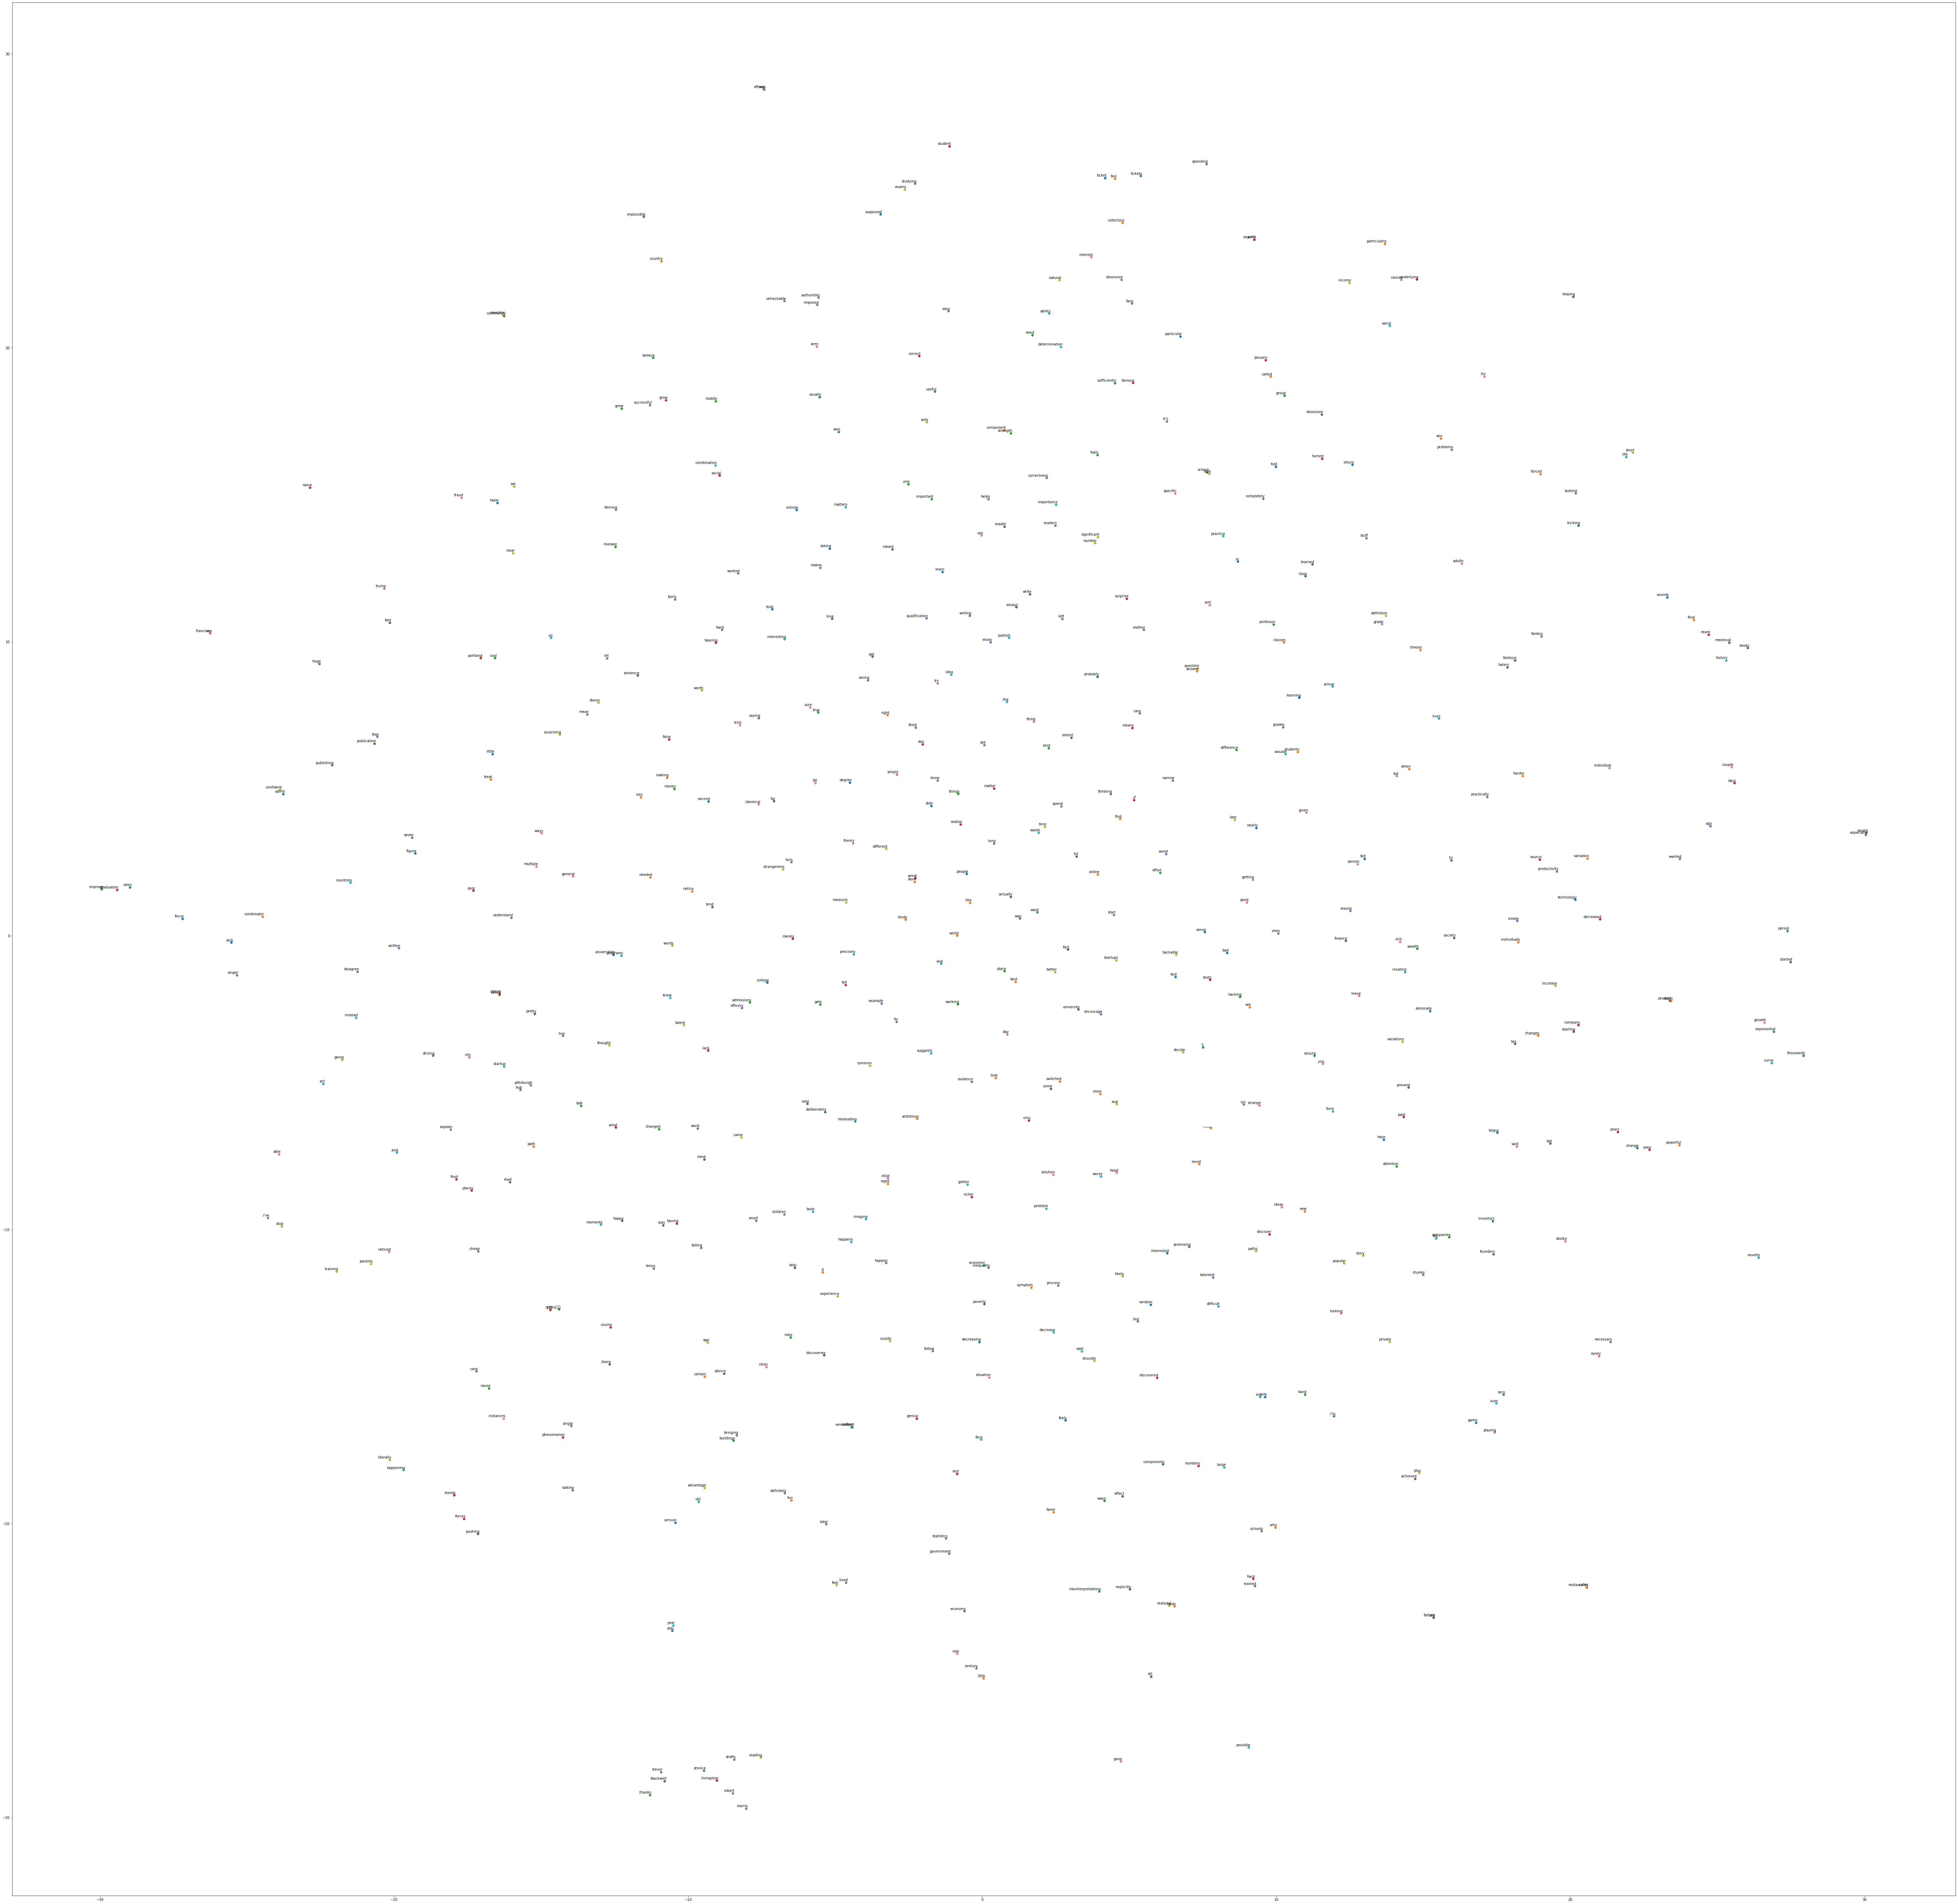

In [47]:
#%matplotlib inline
model.generate_tsne()

t-SNE Plot: Zoom into the above image in a new tab. Right click and View in new tab or download to computer.

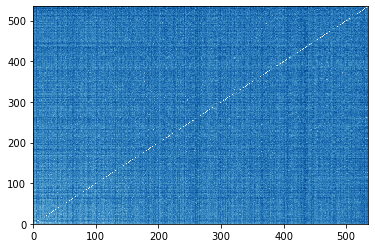

In [48]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(d_mat, cmap=plt.cm.Blues)
plt.show()

Heat map of distance matrix calculated for each word in the vocabulary

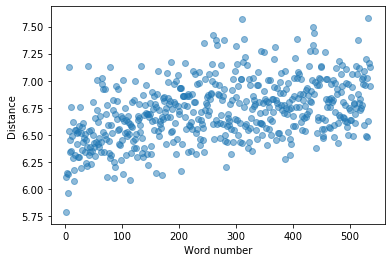

In [49]:
plt.scatter(range(1,len(d_mat2)+1),
                  d_mat2, alpha=0.5)
plt.xlabel('Word number')
plt.ylabel('Distance')
plt.show()

Plotting the average inter-word distances for all words in the final vocabulary

## Telegram Bot using Bot API

To add the bot in Telegram, search for: PaulGraham_bot
The bot will only respond when the below cell is running.

Check tornado version and restart kernel manually if below cell gives "RuntimeError: This event loop is already running"

In [50]:
# Variables to track incoming message types

global count_start 
global count_pic 
global count_word 

count_start = 0
count_pic = 0
count_word = 0

# List to track incoming message timestamps
msg_time = []

import datetime
msg_time.append(datetime.datetime.now())

In [51]:
import logging

from aiogram import Bot, Dispatcher, executor, types

API_TOKEN = '1172267336:AAEtv6pEDf4LCPQMzIe53N7JCksbJ-ex7mg'

# Configure logging
logging.basicConfig(level=logging.INFO)

# Initialize bot and dispatcher
bot = Bot(token=API_TOKEN)
dp = Dispatcher(bot)



@dp.message_handler(commands=['start', 'help'])
async def send_welcome(message: types.Message):
    """
    This handler will be called when user sends `/start` or `/help` command
    """
    
    global count_start
    count_start+=1
    msg_time.append(datetime.datetime.now())
    await message.reply("Hi!\nI'll give you Paul Graham's choice of words!\nType 'Paul' or a word to get similar words.")
    


@dp.message_handler(regexp='(^Paul[s]?$|PG)')
async def cats(message: types.Message):
    with open('data/paul.jpg', 'rb') as photo:
        global count_pic
        count_pic +=1
        msg_time.append(datetime.datetime.now())
        await message.reply_photo(
            'https://pbs.twimg.com/profile_images/1824002576/pg-railsconf_400x400.jpg', # use URL or 'photo'
            caption='This is Paul Graham')

        
        
@dp.message_handler(regexp='(^send)')
async def topic(message: types.Message):
    with open('data/paul.jpg', 'rb') as photo:
        
        print(message.text[0]) 
        print(len(message.text))
        
        global count_pic
        count_pic+=1
        msg_time.append(datetime.datetime.now())
        
        await bot.send_photo(
            message.chat.id,
            photo,
            caption='This is Paul Graham',
            reply_to_message_id=message.message_id,
        )
        
        

@dp.message_handler()
async def echo(message: types.Message):
    
    print('******************')
    
    global count_word
    count_word += 1
    msg_time.append(datetime.datetime.now())
    
    await message.answer(nearest(message.text))


if __name__ == '__main__':
    executor.start_polling(dp, skip_updates=True)

ERROR:asyncio:SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x7f9168c637b8>
transport: <_SelectorSocketTransport fd=61 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/opt/conda/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/opt/conda/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2609)
ERROR:aiogram.dispatcher.dispatcher:Cause exception while getting updates.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 303, in start_polling
    updates = await self.bot.get_updates(limit=limit, offset=offset, timeout=timeout)
  File "/opt/conda/lib/python3.7/site-packages/

S
4


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('Business')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib

******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('Hub')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/pyth

******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('Hub')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/pyth

******************
******************
******************
******************
******************
******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('job')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/pyth

******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('Check')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/py

******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('check')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/py

******************


ERROR:asyncio:Task exception was never retrieved
future: <Task finished coro=<Dispatcher._process_polling_updates() done, defined at /opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py:324> exception=KeyError('utility')>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 332, in _process_polling_updates
    for responses in itertools.chain.from_iterable(await self.process_updates(updates, fast)):
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 188, in process_updates
    return await asyncio.gather(*tasks)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/handler.py", line 117, in notify
    response = await handler_obj.handler(*args, **partial_data)
  File "/opt/conda/lib/python3.7/site-packages/aiogram/dispatcher/dispatcher.py", line 208, in process_update
    return await self.message_handlers.notify(update.message)
  File "/opt/conda/lib/

******************
******************


INFO:aiogram.dispatcher.dispatcher:Stop polling...


## Visualisations

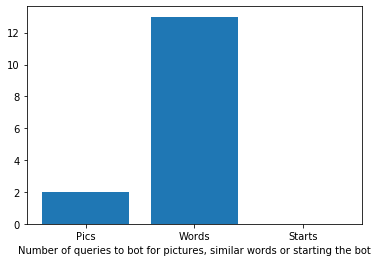

In [52]:
fig,ax = plt.subplots()
ax.bar(['Pics','Words','Starts'],[count_pic,count_word,count_start] );
ax.set_xlabel('Number of queries to bot for pictures, similar words or starting the bot');

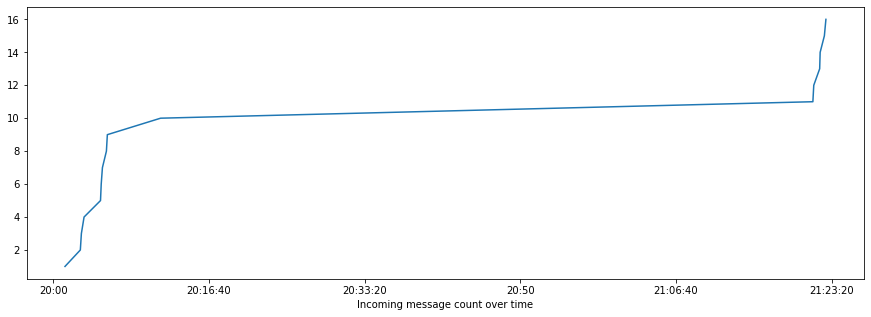

In [53]:
plot_times = [i.time() for i in msg_time]
plot_count = [i for i in range(1,1+len(msg_time))]

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(plot_times,plot_count);
ax.set_xlabel('Incoming message count over time');

In [54]:
diff_time = [j - i for i, j in zip(msg_time[:-1], msg_time[1:])] 
diff_time = [i.seconds for i in diff_time]

In [57]:
np.log(diff_time)

array([4.58496748, 1.79175947, 2.83321334, 4.65396035, 1.38629436,
       1.94591015, 3.21887582, 1.79175947, 5.83481074, 8.34021732,
       1.60943791, 3.61091791, 1.09861229, 3.29583687, 2.19722458])

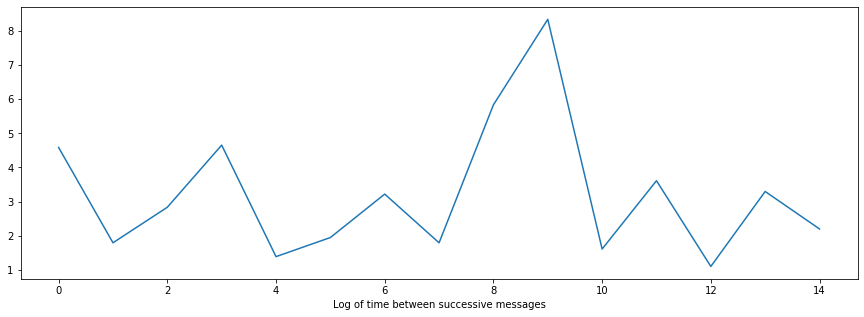

In [62]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(range(len(diff_time)),np.log(diff_time));
ax.set_xlabel('Log of time between successive messages');